In [22]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
from nltk.corpus import stopwords
from collections import Counter

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [27]:
def depicting_wordcloud (df):
    '''
    Depicting the word cloud of the texts of bills 
    
    Parameters:
    -----------------------------
        df: dataframe, including a column called 'bill_text' of the bills in string dtype
        
    Returns:
    -----------------------------
        a word cloud of the words excluding English stopwords
    '''
    corpus_string = ""
    for i in range (len(df)):
        corpus_string += df.iloc[i]['bill_text']
    
    corpus_tokens = nltk.word_tokenize(corpus_string)
    stopwords_set = stopwords.words("English")
    stopwords_set.extend(["would", "could", "one", "may",'section','subsection','Act'])
    wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(corpus_tokens))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

In [18]:
url = "https://goverlytics.p.rapidapi.com/federal-legislation/ca"

def load_data(limit, page):
    querystring = {"include_summary":"true",
                   "include_text":"true",
                   "include_actions":"true",
                   "include_votes":"true",
                   "sponsor_gender":"M",
                   "limit": limit,
                   "page": page,
                  }

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "4d08b76ec0msh553b06f36bc2c52p18a08ejsne688f7dc5de5"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response

response = load_data(90, 1)

list_df = []
for page in range(10):
    list_df.append(pd.DataFrame(load_data(90, page).json()["data"]))

In [19]:
df = pd.concat(list_df, axis=0)
df.shape

(282, 38)

In [20]:
df.head()

,goverlytics_id,source_id,bill_name,session,date_introduced,source_url,chamber_origin,committees,bill_type,bill_title,...,pm_party,pm_party_id,statute_year,statute_chapter,publications,last_major_event,actions,bill_summary,bill_text,votes
0,CAFED_43-2_C-258,10866336,C-258,43-2,2020-12-03,https://www.parl.ca/LegisInfo/BillDetails.aspx...,C,[],Private Member’s Bill,,...,Liberal,1,0,0,[First Reading],"{'date': '2020-12-03', 'status': 'Introduction...","[{'date': '2020-12-03', 'action_by': 'HOC', 'c...",SUMMARY This enactment amends the Canada Lab...,"R.S., c. L-2 Canada Labour Code 1 Sectio...",[]
1,CAFED_43-2_C-272,11112088,C-272,43-2,2021-02-22,https://www.parl.ca/LegisInfo/BillDetails.aspx...,C,"[{'chamber': 'HOC', 'committee': 'Standing Com...",Private Member’s Bill,,...,Liberal,1,0,0,[First Reading],"{'date': '2021-06-02', 'status': 'Second Readi...","[{'date': '2021-02-22', 'action_by': 'HOC', 'c...",SUMMARY This enactment amends the Copyright Ac...,"R.S., c. C-42 Copyright Act 1 (1) Paragraph (a...","[{'nv': 0, 'nay': 0, 'yea': 330, 'date': '2021..."
2,CAFED_43-2_C-280,11172203,C-280,43-2,2021-03-24,https://www.parl.ca/LegisInfo/BillDetails.aspx...,C,[],Private Member’s Bill,Haida Gwaii Residents Tax Deduction Act,...,Liberal,1,0,0,[First Reading],"{'date': '2021-03-24', 'status': 'Introduction...","[{'date': '2021-03-24', 'action_by': 'HOC', 'c...",SUMMARY This enactment amends subsection 110.7...,Short Title Short title 1 This Act may be cite...,[]
3,CAFED_43-2_C-315,11426171,C-315,43-2,2021-06-17,https://www.parl.ca/LegisInfo/BillDetails.aspx...,C,[],Private Member’s Bill,Canada-Taiwan Relations Framework Act,...,Liberal,1,0,0,[First Reading],"{'date': '2021-06-17', 'status': 'Introduction...","[{'date': '2021-06-17', 'action_by': 'HOC', 'c...",SUMMARY This enactment provides a framework fo...,Short Title Short title 1 This Act may be cite...,[]
4,CAFED_43-2_S-5,11356136,S-5,43-2,2021-05-25,https://www.parl.ca/LegisInfo/BillDetails.aspx...,S,[],Senate Government Bill,,...,Liberal,1,0,0,[First Reading],"{'date': '2021-05-25', 'status': 'Introduction...","[{'date': '2021-05-25', 'action_by': 'SEN', 'c...",SUMMARY This enactment amends the Judges Act t...,"R.S., c. J-1 Judges Act 1 Section 2 of the Jud...",[]


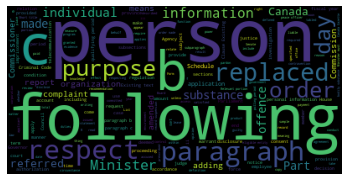

In [28]:
depicting_wordcloud (df)

In [39]:
def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += (ele+" ") 
    return str1

In [ ]:
def person_name_entitiy_hist(df):
    '''
    Depicting the histogram of the Person entities in the bill's texts 
    
    Parameters:
    -----------------------------
        df: dataframe, including a column called 'bill_text' of the bills in string dtype
        
    Returns:
    -----------------------------
        a histogram of the words with Person name entities
    '''
    corpus_string = ""
    for i in range (len(df)):
        corpus_string += df.iloc[i]['bill_text']
    corpus_tokens = nltk.word_tokenize(corpus_string)
    str_1= listToString(corpus_tokens_1)
    doc = nlp(str_1)
    my_list = [(X.text, X.label_) for X in doc.ents]
    ner_cnt = Counter(my_list)
    my_dict = dict(ner_cnt)
    
    person_list = []
    for key in my_dict:
        if key[1] == 'PERSON':
            person_list.append([key,my_dict[key]])
            
    name_list = []
    count_list = []
    for i in range(len(person_list)):
        name_list.append(person_list[i][0][0])
        count_list.append(person_list[i][1])
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(name_list,count_list)
    plt.xticks(rotation=90)
    plt.show()    
     

In [1]:
def topic_pie_chart(df):
    '''
    Depicting the histogram of topic of the bills
    
    Parameters:
    -----------------------------
        df: dataframe, including a column called 'topic' and 'country_id' 
        
    Returns:
    -----------------------------
        a pie chart showing the fraction of the topics of the bills
    '''
    
    df_1.groupby(['topic']).sum().plot(kind='pie',y='country_id', figsize=(5,5),legend=None);
    

In [ ]:
topic_pie_chart(df_1)